In [1]:
include("optimization_library.jl");

# Exercise 8.1: Lagrange

In [2]:
# Objective Function, Gradient and Hessian
f(x) = x[1]^2 + 3*x[2]^2
df(x) = [2*x[1]; 6*x[2]]
Hf(x) = [2 0; 0 6]

# Equality Constraints A*x = b
A = [1 2]
b = [1]

# Dimensionality of x and lambda
nx = size(A,2)
nlambda = size(A,1)

# Define the Lagrangian and its derivatives
L(z) = begin
x = z[1:nx]; lambda = z[nx+1:nx+nlambda]
return f(x) + lambda' * (A*x-b)
end

dL(z) = begin
x = z[1:nx]; lambda = z[nx+1:nx+nlambda]
return vcat(df(x) + A' * lambda, A*x-b)
end

HL(z) = begin
x = z[1:nx]; lambda = z[nx+1:nx+nlambda]
return vcat(hcat(Hf(x), A'), hcat(A, zeros(nlambda,nlambda)))
end

# Solve with Newton's Method (w/o line-search!)
z0 = rand(nx+nlambda)
zstar,trace = newton_descent(L, dL, HL, z0, ls=false)

([0.4285714285714287, 0.2857142857142858, -0.8571428571428574], [0.07919931924071721 0.4285714285714287; 0.2635357080887979 0.2857142857142858; 0.1620785604857795 -0.8571428571428574; 0.15081066805726087 0.42857142857142844])

In [3]:
trace

4×2 Array{Float64,2}:
 0.0791993   0.428571
 0.263536    0.285714
 0.162079   -0.857143
 0.150811    0.428571

In [4]:
zstar

3-element Array{Float64,1}:
  0.4285714285714287
  0.2857142857142858
 -0.8571428571428574

In [5]:
LA.isposdef(HL(z0))

false

In [6]:
LA.det(HL(z0))

-13.999999999999998

# Parcel Box

In [42]:
area = 3
f(x) = -x[1]*x[2]*x[3]
df(x) = [-x[2]*x[3]; -x[1]*x[3]; -x[1]*x[2]]
Hf(x) = [0 -x[3] -x[2];
        -x[3] 0 -x[1];
        -x[2] -x[1] 0]


h(x) = x[1]*x[2] + 2(x[1]*x[3] + x[2]*x[3])-area
dh(x) = [x[2] + 2*x[3];
        x[1] + 2*x[3];
        2*x[1] + 2*x[2]]
Hh(x) = [0 1 2;
        1 0 2;
        2 2 0]

Hh (generic function with 1 method)

In [43]:
LA.isposdef(Hh(z0))

false

In [44]:
# Dimensionality of x and lambda
nx = 3
nlambda = 1

# Define the Lagrangian and its derivatives
L(z) = begin
x = z[1:nx]; lambda = z[nx+1:nx+nlambda]
return f(x) + lambda[1] * h(x)
end

dL(z) = begin
x = z[1:nx]; lambda = z[nx+1:nx+nlambda]
return vcat(df(x) + dh(x) * lambda[1], h(x))
end

HL(z) = begin
x = z[1:nx]; lambda = z[nx+1:nx+nlambda]
return vcat(hcat(Hf(x) + Hh(x)*lambda[1], dh(x)), hcat(dh(x)', zeros(nlambda,nlambda)))
end

HL (generic function with 1 method)

In [45]:
# Solve with Newton's Method (w/o line-search!)
z0 = rand(nx+nlambda)
zstar,trace = newton_descent(L, dL, HL, z0, ls=true)

LoadError: DomainError with -5.15673015882553:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [46]:
zstar

3-element Array{Float64,1}:
  0.4285714285714287
  0.2857142857142858
 -0.8571428571428574

In [47]:
trace

4×2 Array{Float64,2}:
 0.0791993   0.428571
 0.263536    0.285714
 0.162079   -0.857143
 0.150811    0.428571

In [48]:
LA.isposdef(HL(z0))

false

In [49]:
HL(z0) \ -dL(z0)

4-element Array{Float64,1}:
  5.253540919754973
  6.512001242186887
 -1.6945614370246957
 -2.3920488092432084

In [15]:
newton_decrement(dL(z0), HL(z0))

LoadError: DomainError with -14.024830049962684:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [16]:
x_best, trace = ConstraintElimination_ipm(f,df,Hf,A,b;g=[],dg=[],Hg=[],eps = 0.0001, barrier_increase = 2.0,
                                    maxiters = 100, inner_maxiters = 100)

LoadError: ArgumentError: reducing over an empty collection is not allowed

# Exercise 8.1: Optimal Path for Santa

<img src="figures/santa-claus.png" width="300">

In [77]:
c = [4857; 3281; 7891; 7891; 7312; 7312; 9892; 9892]

8-element Array{Int64,1}:
 4857
 3281
 7891
 7891
 7312
 7312
 9892
 9892

In [78]:
using JuMP
using COSMO

In [79]:
A = [1 1 0 0 0 0 0 0;
    0 1 1 -1 0 0 -1 1;
    1 0 -1 1 1 -1 0 0;
    0 0 0 0 -1 1 1 -1]

d_eu = 78
d_usa = 60
d_bz = 40
supply = d_eu + d_usa + d_bz


b = [supply; d_eu; d_usa; d_bz]

nx = length(c)

8

In [81]:
model = Model(COSMO.Optimizer)
@variable(model, x[1:nx])
@constraint(model, A * x .== b)
@constraint(model,  -x .<= zeros(nx))
@objective(model, Min, c'*x)
optimize!(model)

------------------------------------------------------------------
          COSMO v0.7.8 - A Quadratic Objective Conic Solver
                         Michael Garstka
                University of Oxford, 2017 - 2020
------------------------------------------------------------------

Problem:  x ∈ R^{8},
          constraints: A ∈ R^{12x8} (24 nnz),
          matrix size to factor: 20x20,
          Floating-point precision: Float64
Sets:     Nonnegatives of dim: 8
          ZeroSet of dim: 4
Settings: ϵ_abs = 1.0e-04, ϵ_rel = 1.0e-04,
          ϵ_prim_inf = 1.0e-06, ϵ_dual_inf = 1.0e-04,
          ρ = 0.1, σ = 1e-06, α = 1.6,
          max_iter = 2500,
          scaling iter = 10 (on),
          check termination every 40 iter,
          check infeasibility every 40 iter,
          KKT system solver: QDLDL
Setup Time: 0.37ms

Iter:	Objective:	Primal Res:	Dual Res:	Rho:
1	-6.8507e+09	1.6008e+05	5.9350e+03	1.0000e-01
40	6.8549e+05	6.4105e+01	1.9034e+00	1.0000e-01
80	7.0857e+05	1.0159e+0

In [84]:
model = Model(SCS.Optimizer)
@variable(model, x[1:nx])
@constraint(model, A * x .== b)
@constraint(model,  -x .<= zeros(nx))
@objective(model, Min, c'*x)
optimize!(model)

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 24, CG tol ~ 1/iter^(2.00)
eps = 1.00e-005, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-003
Variables n = 8, constraints m = 12
Cones:	primal zero / dual free vars: 4
	linear vars: 8
Setup time: 1.48e-004s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|1.85e+019 3.45e+019 1.00e+000 -5.04e+025 5.89e+025 4.00e+025 6.07e-005 
    40|9.75e-007 3.21e-006 1.15e-006 1.03e+006 1.03e+006 3.64e-010 1.26e-003 
---------------------------------------------------------------------

In [85]:
sol = value.(x)

8-element Array{Float64,1}:
 99.99998337322089
 78.00003936869246
 -2.3186648417860727e-5
  1.558257599109937e-5
 -5.2352190426652274e-5
 40.00007195633986
 -9.083558334650221e-5
 -7.297989646168839e-5

# Truss Structure

In [2]:
using Luxor

In [3]:
# Joints. Each is a two-vector with the x-y coordinate
J = [[x,y] for x=0:1:2, y=-1:1:1]
nJ = length(J) # number of joints

# Beams. Connects all joints that are in a radius < 2m. Each is a tuple with joint indices
rad = 2.0
B = [(i,j) for i=1:nJ, j = 1:nJ if j < i && LinearAlgebra.norm(J[i]-J[j]) < rad]
nB = length(B)

# Beams connected to each joint
Bj = [[b for b=1:nB if B[b][1] == j || B[b][2] == j] for j=1:nJ];

# Cantilever joints
max_x = maximum([J[i][1] for i=1:nJ])
Jc = [i for i=1:nJ if ((J[i][1] == 0 || J[i][1] == max_x) && J[i][2] <= 0)];
nC = length(Jc) # number of cantilever points

Bareas = ones(nB) * 100;

# External joint loads
Jl = [J[j][2] == 0 ? [0.0, -2000*9.81] : [0.0,0.0] for j=1:nJ];

In [4]:
J

3×3 Array{Array{Int64,1},2}:
 [0, -1]  [0, 0]  [0, 1]
 [1, -1]  [1, 0]  [1, 1]
 [2, -1]  [2, 0]  [2, 1]

In [5]:
# J: Joints
# B: Beams
# Jc: Cantilever joints
# Jl: Joint load
# A: Beam cross-sectional area
function drawTruss(J, B, Jc, Jl, A)
    scale = 40
    function pos(j)
        return Point(J[j][1]*scale - 400, -J[j][2]*scale)
    end
    @pdf begin
        background("white")
        
        # Draw beams
        setcolor("black")
        for b=1:nB
            if A[b] <= 1
                continue
            end
            setline(sqrt(A[b]))
            line(pos(B[b][1]), pos(B[b][2]), :stroke)
        end
        
        # Draw road
        setcolor("blue")
        setline(5)
        line(Point(-400,0), Point(-400 + max_x*scale,0), :stroke)
        
        # Draw joints
        setcolor("red")
        for j = 1:length(J)
            if j in Jc
                circle(pos(j), 8, :fill)
            end
        end
        
        # Draw load arrows
        setcolor("green")
        for j = 1:length(J)
            if LinearAlgebra.norm(Jl[j]) <= 0.1
                continue
            end
            Luxor.arrow(pos(j), pos(j) - (Point(Jl[j][1], Jl[j][2])/500), linewidth=5)
        end
    end 1000 400
end

drawTruss (generic function with 1 method)

In [6]:
drawTruss(J,B,Jc,Jl,Bareas/10)

# The Optimisation Problem

target variable is $x = [f1, f2, \dots, \tilde f1, \tilde f2, \dots]$
the objective function is c'x

the number of constraints is
 - 2 * nB inequality constraints for the absolute value
 - 2 * (nJ - nC) equality constraints for the joint constraints

In [7]:
c = vcat(zeros(nB), [LinearAlgebra.norm(J[b[1]]-J[b[2]]) for b in B]);

In [8]:
# Equality constraints Ax = b
A = zeros(2 * (nJ-nC), length(c));
b = zeros(2 * (nJ-nC))'

idx = 0
for j=1:nJ
    # ignore cantilever joints
    if j in Jc
        continue
    end
    
    # External Load applied at the joint
    b[2*idx+1] = -Jl[j][1] # joint load in x-direction
    b[2*idx+2] = -Jl[j][2] # joint load in y-direction
    
    # Sum of the beams connected to j
    for b in Bj[j]
        db = J[B[b][1]] - J[B[b][2]] # beam direction vector
        db_dir = db / LinearAlgebra.norm(db)
        A[2*idx+1,b] = db_dir[1] # force across the beam in x-direction
        A[2*idx+2,b] = db_dir[2] # force across the beam in y-direction
    end
    
    idx = idx + 1
end

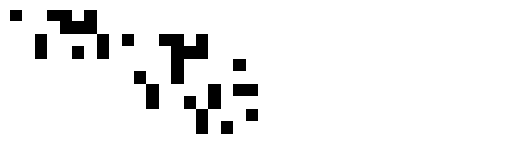

In [9]:
spy(A)
PyPlot.plt.axis("off")
savefig("bridge_spy.pdf", bbox_inches="tight")

In [10]:
nx = length(c)

g = Vector(undef, 2*nB)
dg = Vector(undef, 2*nB)
Hg = Vector(undef, 2*nB)
    
for i in 1:nB # fb - tildefb <= 0
    g[i] = x -> x[i] - x[i+nB]
    dg[i] = x -> begin d = zeros(nx); d[i] = 1; d[i+nB] = -1; return d end
    Hg[i] = x -> zeros(nx, nx)
end

for i in 1:nB # -fb - tildefb <= 0
    g[i+nB] = x -> - x[i] - x[i+nB]
    dg[i+nB] = x -> begin d = zeros(nx); d[i] = -1; d[i+nB] = -1; return d end
    Hg[i+nB] = x -> zeros(nx, nx)
end


f(x) = c'*x
df(x) = c
Hf(x) = zeros(nx,nx)

Hf (generic function with 1 method)

In [11]:
println("Dimensions of the problem")
println("size(x): ",nx)
println("inequalities: ", 2*nB)

Dimensions of the problem
size(x): 40
inequalities: 40


In [33]:
#x_best, trace = ConstraintElimination_ipm(f,df,Hf,A,b',g=g,dg = dg, Hg = Hg, eps = 0.0001, barrier_increase = 2.0)
#round.(reshape(x_best, (4,3)),digits = 4)

5549.219690645689
Maximum number of outer iterations reached!


LoadError: Problem has no admissible interior point

In [35]:
#import DelimitedFiles
#DF = DelimitedFiles;

In [36]:
#open("Truss_results.csv", "w") do io
#           DF.writedlm(io, [vcat(x_best, zeros(2)) trace])
#end;

LoadError: UndefVarError: x_best not defined

In [ ]:
# Dataset of Mc Donalds Products and corresponding calories and nutrients
#results = DF.readdlm("McDonalds_results.csv")
#amount = results[1:end-2,1]
#trace = results[1:end,2:end]

# Solver

In [12]:
using JuMP
using SCS

In [13]:
# Inequality constraints Bx <= d
C = zeros(2 * nB, length(c))
d = zeros(2 * nB);
for b = 1:nB
    # fb - tildefb <= 0
    C[2*b-1,b] = 1.0
    C[2*b-1,b+nB] = -1.0
    
    # -fb - tildefb <= 0
    C[2*b,b] = -1.0
    C[2*b,b+nB] = -1.0
end

In [14]:
model = Model(SCS.Optimizer)
@variable(model, x[1:2*nB])
@constraint(model, A * x .== b)
@constraint(model, C * x .<= d)
@objective(model, Min, c'*x)
optimize!(model)

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 420, CG tol ~ 1/iter^(2.00)
eps = 1.00e-005, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-003
Variables n = 40, constraints m = 140
Cones:	primal zero / dual free vars: 100
	linear vars: 40
Setup time: 6.48e-005s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|1.25e+019 3.05e+019 1.00e+000 -2.34e+024 1.83e+025 9.31e+024 3.34e-005 
    20|3.63e+011 3.22e+012 6.50e-001 2.70e+024 1.27e+025 1.00e+025 4.05e-004 
---------------------------------------------------------------

In [15]:
sol = value.(x[nB+1:2*nB])
drawTruss(J,B,Jc,Jl, sol/1000)

# Tests

In [ ]:
h(x) = x[2]
dh(x) = [0;1]
Hh(x) = [0 0; 0 0]
g1(x) = x[1] - x[2]
dg1(x) = [1; -1]
Hg1(x) = [0 0; 0 0]
g2(x) = -x[2]
dg2(x) = [0; -1]
Hg2(x) = [0 0; 0 0]

In [ ]:
sol, trace = ipm(h, dh, Hh, [-0.5,1], g = [g1,g2], dg = [dg1,dg2], Hg = [Hg1,Hg2])